In [1]:
import os
import matplotlib 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd

# Constants

In [2]:
lead_time = 4
experiment_names = ["SIC_Attention_Res_UNet", "SIC_Attention_Res_UNet_2014_2020", "SIC_Attention_Res_UNet_2015_2020", "SIC_Attention_Res_UNet_2016_2020", "SIC_Attention_Res_UNet_2017_2020", "SIC_Attention_Res_UNet_2018_2020", "SIC_Attention_Res_UNet_2019_2020", "SIC_Attention_Res_UNet_2020_2020"]
list_benchmarks = ["Persistence", "Anomaly_persistence", "TOPAZ", "TOPAZ_bias_corrected"]
#
date_min = "20220101"
date_max = "20221231"
period = date_min + "_" + date_max
#
path_output = "/lustre/storeB/users/cyrilp/COSI/Figures/Article/" 
#
sizefont = 25
sizefont_legend = 16
linewidth = 3
alpha = 1

In [3]:
def read_dataset(experiment_names, list_benchmarks, period, lead_time):    
    Scores = {}
    #
    for exp in experiment_names:
        path_exp = "/lustre/storeB/project/copernicus/cosi/WP3/Data/Predictions/" + exp + "/lead_time_" + str(lead_time) + "_days/scores/"
        Dataset = pd.read_csv(path_exp + "Scores_" + period + ".txt", delimiter = "\t")
        #
        for var in Dataset:
            Scores[exp + "_" + var] = np.mean(Dataset[var])
    #
    RMSE_ML = np.full(len(experiment_names), np.nan)
    NIIEE_ML = np.full(len(experiment_names), np.nan)
    for i, exp in enumerate(experiment_names):
        RMSE_ML[i] = np.copy(Scores[exp + "_RMSE_ML"])
        NIIEE_ML[i] = np.copy(Scores[exp + "_IIEElength_15_ML"])
    #
    RMSE = {}
    NIIEE = {}
    RMSE["ML"] = np.copy(RMSE_ML)
    NIIEE["ML"] = np.copy(NIIEE_ML)
    for bf in list_benchmarks:
        RMSE[bf] = np.repeat(Scores[experiment_names[0] + "_RMSE_" + bf], len(experiment_names))
        NIIEE[bf] = np.repeat(Scores[experiment_names[0] + "_IIEElength_15_" + bf], len(experiment_names))
    #
    return(RMSE, NIIEE)

In [4]:
def figure(RMSE, NIIEE, experiment_names, path_output, lead_time = lead_time, saving = False):
    #
    xticks_labels = []
    for exp in experiment_names:
        if exp == "SIC_Attention_Res_UNet":
            label_str = "2013-2020"
        else:
            label_str = exp.replace("SIC_Attention_Res_UNet_", "").replace("_", "-")
        xticks_labels.append(label_str)
    #
    plt.figure()
    plt.rc("xtick", labelsize = sizefont)
    plt.rc("ytick", labelsize = sizefont)
    fig, ax = plt.subplots(1, 2, figsize = (25, 10), facecolor = "w", edgecolor = "k")
    #
    ax = plt.subplot(121)
    ax.grid(alpha = 0.4)
    l = ax.plot(np.arange(len(experiment_names)), RMSE["ML"], color = "b", label = "Deep learning", linewidth = linewidth)
    l = ax.plot(np.arange(len(experiment_names)), RMSE["Persistence"], color = "k", label = "Persistence", linewidth = linewidth)
    l = ax.plot(np.arange(len(experiment_names)), RMSE["Anomaly_persistence"], color = "grey", label = "Anomaly_persistence", linewidth = linewidth)
    l = ax.plot(np.arange(len(experiment_names)), RMSE["TOPAZ"], color = "r", label = "TOPAZ4", linewidth = linewidth)
    l = ax.plot(np.arange(len(experiment_names)), RMSE["TOPAZ_bias_corrected"], color = "m", label = "TOPAZ4 bias corrected", linewidth = linewidth)
    ax.set_title("RMSE", fontsize = sizefont, fontweight = "bold")
    ax.set_ylabel("RMSE (%)", fontsize = sizefont)
    ax.set_xticks(np.arange(len(experiment_names)), xticks_labels, rotation = 45, ha = "right", fontsize = sizefont)
    ax.set_xlabel("Training period", fontsize = sizefont)
    ax.legend(fontsize = sizefont_legend,  bbox_to_anchor=(0.97, 0.95), ncol = 1)
    #
    ax = plt.subplot(122)
    ax.grid(alpha = 0.4)
    l = ax.plot(np.arange(len(experiment_names)), 0.001 * NIIEE["ML"], color = "b", label = "Deep learning", linewidth = linewidth)
    l = ax.plot(np.arange(len(experiment_names)), 0.001 * NIIEE["Persistence"], color = "k", label = "Persistence", linewidth = linewidth)
    l = ax.plot(np.arange(len(experiment_names)), 0.001 * NIIEE["Anomaly_persistence"], color = "grey", label = "Anomaly_persistence", linewidth = linewidth)
    l = ax.plot(np.arange(len(experiment_names)), 0.001 * NIIEE["TOPAZ"], color = "r", label = "TOPAZ4", linewidth = linewidth)
    l = ax.plot(np.arange(len(experiment_names)), 0.001 * NIIEE["TOPAZ_bias_corrected"], color = "m", label = "TOPAZ4 bias corrected", linewidth = linewidth)
    ax.set_title("Ice edge distance error", fontsize = sizefont, fontweight = "bold")
    ax.set_ylabel("Distance error (km)", fontsize = sizefont)
    ax.set_xticks(np.arange(len(experiment_names)), xticks_labels, rotation = 45, ha = "right", fontsize = sizefont)
    ax.set_xlabel("Training period", fontsize = sizefont)
    #ax.legend(fontsize = sizefont_legend, loc = 'best', ncol = 1)
    #
    if saving == True:
        plt.savefig(path_output + "Scores_depending_on_training_period_" + date_min + "_" + date_max + "_lead_time_" + str(lead_time + 1) + "_days.png", bbox_inches = "tight")
    else:
        plt.show()

<Figure size 640x480 with 0 Axes>

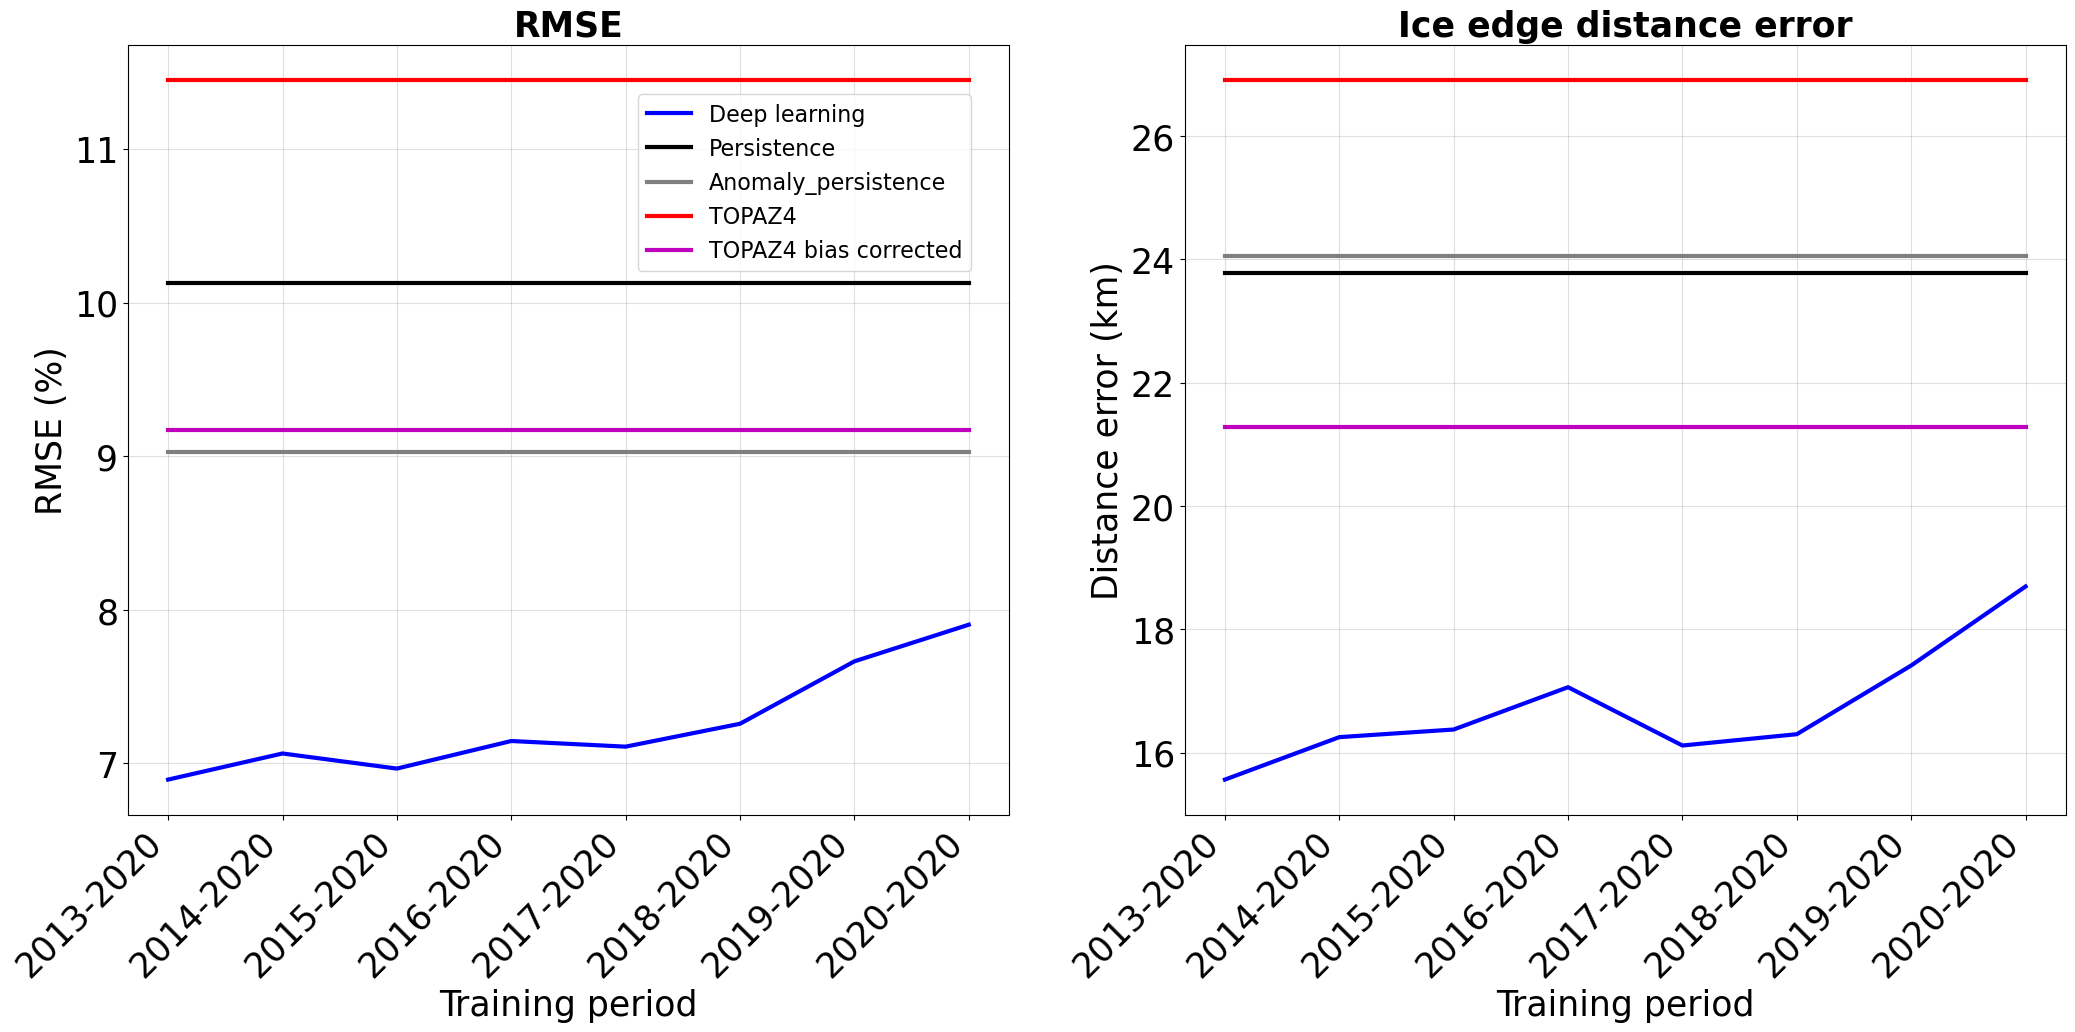

In [5]:
RMSE, NIIEE = read_dataset(experiment_names, list_benchmarks, period, lead_time)
figure(RMSE, NIIEE, experiment_names, path_output, lead_time, saving = True)
#

In [6]:
NIIEE["ML"]

array([15560.94117647, 16249.52941176, 16373.2745098 , 17059.7394958 ,
       16113.63585434, 16297.2745098 , 17411.33893557, 18693.07843137])

In [7]:
np.min(NIIEE["ML"])

15560.941176470587